# **Mall Customers Dataset**
## Customer Segmentation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('Mall_Customers.csv')
data = pd.DataFrame(data)
df = data.copy()
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Remove space and rename columns**

In [4]:
# Remove Spaces
df.columns = df.columns.str.replace(' ', '')

# Rename some column names
df = df.rename(columns={"Genre":"Gender", "AnnualIncome(k$)": "IncomeAnnual", "SpendingScore(1-100)":"SpendingScore"})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'IncomeAnnual', 'SpendingScore'], dtype='object')

In [5]:
# Convert annual income into thousands
df.IncomeAnnual = df.IncomeAnnual * 1000
df.IncomeAnnual

0       15000
1       15000
2       16000
3       16000
4       17000
        ...  
195    120000
196    126000
197    126000
198    137000
199    137000
Name: IncomeAnnual, Length: 200, dtype: int64

**Identify Missing Values if Any**

In [6]:
# Identify Missing Values if Any
df.isnull().sum().sort_values(ascending=False)

CustomerID       0
Gender           0
Age              0
IncomeAnnual     0
SpendingScore    0
dtype: int64

**Summary Statistics**

In [7]:
df.describe()

,CustomerID,Age,IncomeAnnual,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


**Gender Distribution**

A bar plot and pie chart to show the gender distribution in the dataset

In [9]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**Customer Gender Visualization**

In [18]:
sns.set_theme(style="ticks", color_codes=True)

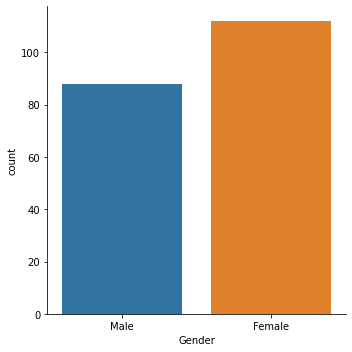

In [11]:
sns.catplot(x="Gender", kind="count", data=df)


Text(0.5, 1.0, 'Ratio of male and female distribution')

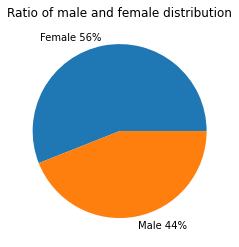

In [10]:
df_to_pie = df.groupby('Gender')['Gender'].count()

fem_ratio = floor((df_to_pie.Female / df_to_pie.sum()) *100)
male_ratio = 100 - fem_ratio
plt.pie(x=df_to_pie, labels=['Female '+str(fem_ratio)+"%", 'Male '+str(male_ratio)+"%"])
plt.title("Ratio of male and female distribution")

**Age Distribution**

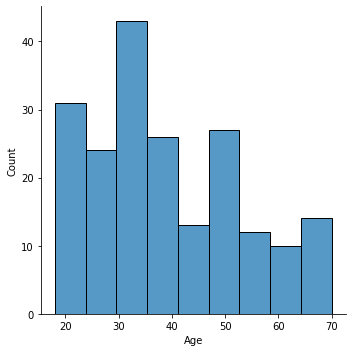

In [16]:
sns.displot(df.Age)

**Annual Income Analysis**

In [17]:
df.IncomeAnnual.describe()

count       200.000000
mean      60560.000000
std       26264.721165
min       15000.000000
25%       41500.000000
50%       61500.000000
75%       78000.000000
max      137000.000000
Name: IncomeAnnual, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

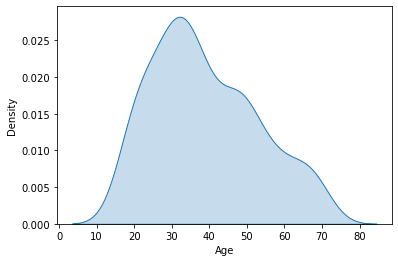

In [27]:
sns.kdeplot(data=df.Age, fill=True)


**Analyzing Spending Score**

In [28]:
df.SpendingScore.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: SpendingScore, dtype: float64

<AxesSubplot:xlabel='SpendingScore'>

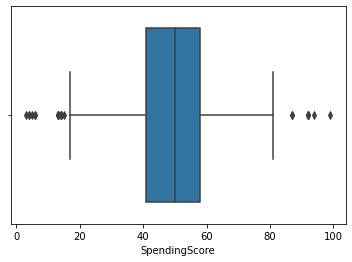

In [33]:
sns.boxplot(data=df.SpendingScore, x=df.SpendingScore)

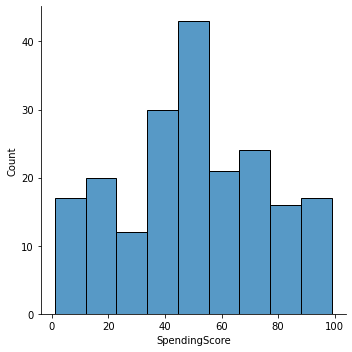

In [34]:
sns.displot(df.SpendingScore)

**KMeans Clustering**

In [44]:
# drop customer ID column
df_kmeans = df.drop(['CustomerID', 'Gender'], axis=1)

df_kmeans.describe()

,Age,IncomeAnnual,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


Due to substantial variation in magnitude of data between Age, Annual Income and Spending Score, the data wll be scaled to the same magnitude

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_kmeans)


# Statistics of scaled data

pd.DataFrame(data_scaled).describe()

,0,1,2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


**Kmeans Function**

In [49]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the kmeans algorithm on scaled data
kmeans.fit(data_scaled)

c:\Users\kojog\anaconda3\envs\dsmlbootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [50]:
# inertia on the fitted data
kmeans.inertia_

389.3861889564372

**Plot Elbow curve to find optimal number of clusters**

c:\Users\kojog\anaconda3\envs\dsmlbootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kojog\anaconda3\envs\dsmlbootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kojog\anaconda3\envs\dsmlbootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kojog\anaconda3\envs\dsmlbootcamp\lib\site-packages\sklearn\cluster\_kmea

Text(0, 0.5, 'Inertia')

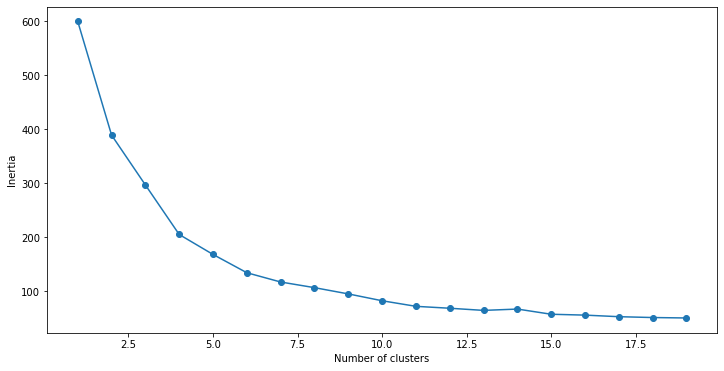

In [55]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_init = 1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')